In [1]:
#!unzip dank_data-master.zip

In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
import matplotlib.pyplot as plt
import logging
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing import image

In [3]:
test_data = pd.read_csv('test_data.csv')

In [4]:
logger = logging.getLogger()
logger.disabled = False
predict_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_prediction_generator = predict_datagen.flow_from_dataframe(
              dataframe=test_data,
              directory="/content/dank_data-master/data/test/",
              x_col="id",
              batch_size=30,
              seed=42,
              shuffle=False,
              class_mode=None,
              target_size= (512,512))

Found 1719 validated image filenames.


In [5]:
def final_1(test_prediction_generator,test_data):
    model = tf.keras.models.load_model('/content/bestmodel_512.h5',compile=False)
    prediction=model.predict_generator(test_prediction_generator,steps=len(test_prediction_generator),workers=12)
    prediction=((prediction > 0.5)+0).ravel()     
    return prediction
test_prediction=final_1(test_prediction_generator,test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Test accuracy_score 0.6009307737056429
Test F1_score 0.5674653215636822
Test confusion matrix


Text(0.5, 15.0, 'Predicted label')

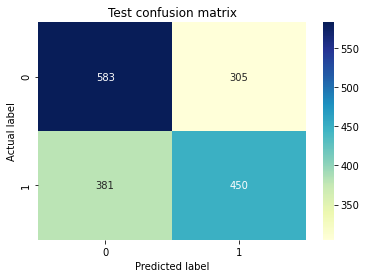

In [6]:
y_test=test_data['dank_level'].values
accuracy=accuracy_score(y_test,test_prediction)
print("Test accuracy_score",accuracy)
f1_test_score=f1_score(y_test,test_prediction)
print("Test F1_score",f1_test_score)
print("Test confusion matrix")
cnf_matrix2=confusion_matrix(y_test,test_prediction)
p = sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Test confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [7]:
def final_2(image_id):
    model = tf.keras.models.load_model('/content/bestmodel_512.h5',compile=False)
    test_image = image.load_img('/content/dank_data-master/data/test/'+image_id,target_size=(512,512))
    test_image = image.img_to_array(test_image)
    test_image=test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    prediction = model.predict(test_image)  
    if prediction[0]<=0.5:
        return print("The image classified is Not Dank")
    else:
        return print("The image classified is Dank")
prediction=final_2(image_id='fki2jc.jpg')
prediction

The image classified is Not Dank


In [3]:
print('Performance Chart')
performance = {'Model': ['simple convultion model','lstm model','simple conv with lstm mode','VGG16 with lstm','VGG19 with lstm','Resnet with lstm','VGG16','VGG19','ResNet50'],
             'Accuracy': [0.5142,0.5590,0.5479,0.5799,0.5072,0.5584,0.6009,0.5503,0.5078],
             'F1score': [0.5394,0.4475,0.4373,0.5441,0.5468,0.5435,0.5674,0.5683,0.4994],
             'Cnn_Model_size':['1.64 MB','-','1.64 MB','313 MB','93.1 MB','191 MB','184 MB','93.1 MB','191 MB'],
             'lstm_Model_size':['-','11.1 MB','14.1 MB','26.8 MB','25.6 MB','25.4 MB','-','-','-']           
            } 
df = pd.DataFrame(performance, columns= ['Model','Accuracy','F1score','Cnn_Model_size','lstm_Model_size'])
df

Performance Chart


,Model,Accuracy,F1score,Cnn_Model_size,lstm_Model_size
0,simple convultion model,0.5142,0.5394,1.64 MB,-
1,lstm model,0.5590,0.4475,-,11.1 MB
2,simple conv with lstm mode,0.5479,0.4373,1.64 MB,14.1 MB
3,VGG16 with lstm,0.5799,0.5441,313 MB,26.8 MB
4,VGG19 with lstm,0.5072,0.5468,93.1 MB,25.6 MB
5,Resnet with lstm,0.5584,0.5435,191 MB,25.4 MB
6,VGG16,0.6009,0.5674,184 MB,-
7,VGG19,0.5503,0.5683,93.1 MB,-
8,ResNet50,0.5078,0.4994,191 MB,-
